# Step 1: Import Libraries

In [5]:
import pandas as pd

In [5]:
# with open('ChemRxiv.csv', 'r') as file:
#     lines = file.readlines()

# for i in range (len(lines) - 1):
#     lines[i] = lines[i].replace('', ',')
# with open('ChemRxiv.csv', 'w') as file:
#     file.writelines(lines)

# Step 2: Use pandas to read CSV data

In [53]:
dataSet = pd.read_csv('ChemRxiv.csv', sep='\s+') # sep='\s+' is for whitespace separated values

# Concatenate split columns back together
dataSet.columns = [
    ' '.join(dataSet.columns[i:i+4]) # join 15 to 15+4
    if i == 15 else dataSet.columns[i] # otherwise keep the column name
    for i in range(len(dataSet.columns)) # for each range of total num of columns
]

# Drop the specified columns
columns_to_remove = ['-', 'Arrhenius', 'fits)']
dataSet = dataSet.drop(columns=columns_to_remove)

In [54]:
# Display the dataset
print(dataSet.head())

   Sample      Salt   VC        EC       EMC     C1-0C    C2-10C    C3-20C  \
0       1  0.053197  0.0  0.318338  0.628464 -2.303717 -2.213647 -2.138183   
1       2  0.061109  0.0  0.315664  0.623228 -2.293543 -2.199740 -2.120343   
2       3  0.064980  0.0  0.314366  0.620654 -2.293145 -2.205565 -2.120255   
3       4  0.079188  0.0  0.309541  0.611272 -2.312285 -2.208360 -2.126960   
4       5  0.094764  0.0  0.304009  0.601227 -2.319545 -2.217755 -2.131715   

     C4-30C    C5-40C    C6-50C    C7-60C        S0        S1        S2  \
0 -2.068923 -2.005360 -1.947687 -1.886993 -2.301608 -0.664652 -0.061665   
1 -2.056800 -1.989620 -1.921433 -1.856203 -2.289248 -0.652838 -0.003456   
2 -2.034390 -1.965930 -1.894800 -1.835285 -2.295247 -0.718122 -0.027725   
3 -2.047955 -1.978495 -1.918330 -1.880780 -2.312920 -0.824820 -0.246872   
4 -2.024845 -1.987385 -1.896325 -1.835220 -2.319161 -0.795042 -0.098066   

   log(eror - Arrhenius fits)  
0                   -6.039789  
1               

# How many columns and rows are there?

In [55]:
rows, columns = dataSet.shape
print(f'The dataset has {rows} rows and {columns} columns')

The dataset has 51 rows and 16 columns


# What are columns names and their types

In [56]:
ColumnsHeader = dataSet.columns[:]
for col in ColumnsHeader:
    print(f"name: {col}, dtype: {dataSet[col].dtype}")

name: Sample, dtype: int64
name: Salt, dtype: float64
name: VC, dtype: float64
name: EC, dtype: float64
name: EMC, dtype: float64
name: C1-0C, dtype: float64
name: C2-10C, dtype: float64
name: C3-20C, dtype: float64
name: C4-30C, dtype: float64
name: C5-40C, dtype: float64
name: C6-50C, dtype: float64
name: C7-60C, dtype: float64
name: S0, dtype: float64
name: S1, dtype: float64
name: S2, dtype: float64
name: log(eror - Arrhenius fits), dtype: float64


# Data Cleaning

## 1. Remove duplicate entries from your data

In [57]:
display(dataSet.drop_duplicates())

,Sample,Salt,VC,EC,EMC,C1-0C,C2-10C,C3-20C,C4-30C,C5-40C,C6-50C,C7-60C,S0,S1,S2,log(eror - Arrhenius fits)
0,1,0.053197,0.000000,0.318338,0.628464,-2.303717,-2.213647,-2.138183,-2.068923,-2.005360,-1.947687,-1.886993,-2.301608,-0.664652,-0.061665,-6.039789
1,2,0.061109,0.000000,0.315664,0.623228,-2.293543,-2.199740,-2.120343,-2.056800,-1.989620,-1.921433,-1.856203,-2.289248,-0.652838,-0.003456,-5.347156
2,3,0.064980,0.000000,0.314366,0.620654,-2.293145,-2.205565,-2.120255,-2.034390,-1.965930,-1.894800,-1.835285,-2.295247,-0.718122,-0.027725,-5.892069
3,4,0.079188,0.000000,0.309541,0.611272,-2.312285,-2.208360,-2.126960,-2.047955,-1.978495,-1.918330,-1.880780,-2.312920,-0.824820,-0.246872,-5.512638
4,5,0.094764,0.000000,0.304009,0.601227,-2.319545,-2.217755,-2.131715,-2.024845,-1.987385,-1.896325,-1.835220,-2.319161,-0.795042,-0.098066,-4.488718
5,6,0.104944,0.000000,0.300954,0.594103,-2.326665,-2.212640,-2.114320,-2.036805,-1.963535,-1.891620,-1.822580,-2.323173,-0.847579,-0.144685,-5.426849
6,7,0.113606,0.000000,0.298470,0.587925,-2.366120,-2.260485,-2.148515,-2.060380,-1.984455,-1.913890,-1.889980,-2.373493,-1.006158,-0.388918,-4.687432
7,8,0.121234,0.000000,0.295346,0.583421,-2.389340,-2.261717,-2.153737,-2.060297,-1.976197,-1.898713,-1.823757,-2.386904,-0.967804,-0.180484,-5.906162
8,9,0.130907,0.000000,0.292052,0.577041,-2.414837,-2.282140,-2.170563,-2.072117,-1.975907,-1.886333,-1.805687,-2.412039,-0.982403,-0.099161,-5.866529
9,10,0.138088,0.000000,0.289756,0.572156,-2.434957,-2.305880,-2.188973,-2.090080,-2.003153,-1.924287,-1.842430,-2.433681,-1.010775,-0.183263,-5.758084


## 2. Check if there are any outliers in the data and remove outliers

### 2.1 Library

In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2.2 Using boxplots to check outliers in the data

#### 1st Way

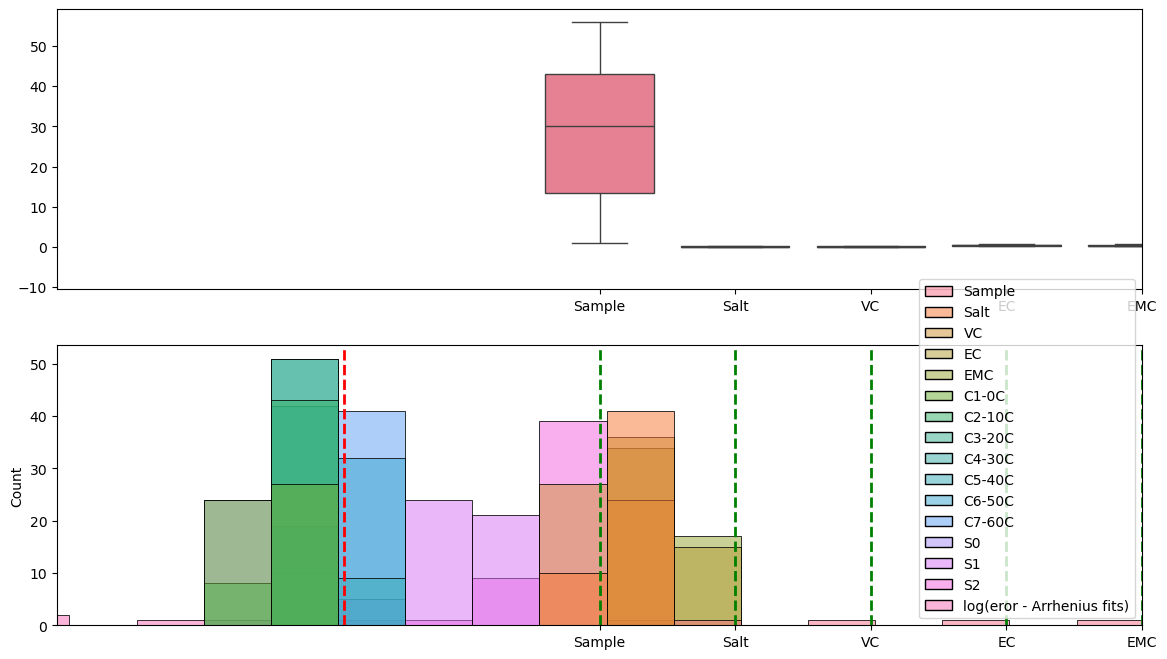

In [80]:
# normal = np.random.normal(loc=0, scale=1, size=1000)
quartiles = pd.DataFrame(data=dataSet).quantile([0.25, 0.5, 0.75, 1])

fig, axs = plt.subplots(nrows=2)
fig.set_size_inches(14, 8)

# Boxplot of Normal Distribution
plot1 = sns.boxplot(dataSet, ax=axs[0])
plot1.set(xlim=(-4, 4))

# Normal Distribution
plot2 = sns.histplot(dataSet, ax=axs[1])
plot2.set(xlim=(-4, 4))

# Median Line
plt.axvline(np.median(dataSet), color='r', linestyle='dashed', linewidth=2)

for i, q in enumerate(quartiles):
    # Quartile i line
    plt.axvline(q, color='g', linestyle='dashed', linewidth=2)

#### Removing Outliners

<Axes: >

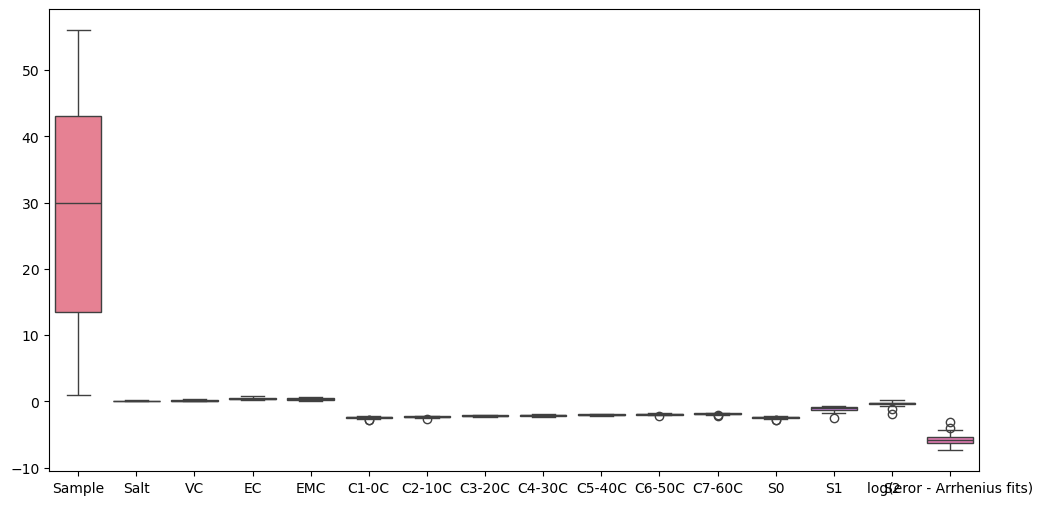

In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataSet)

<Axes: >

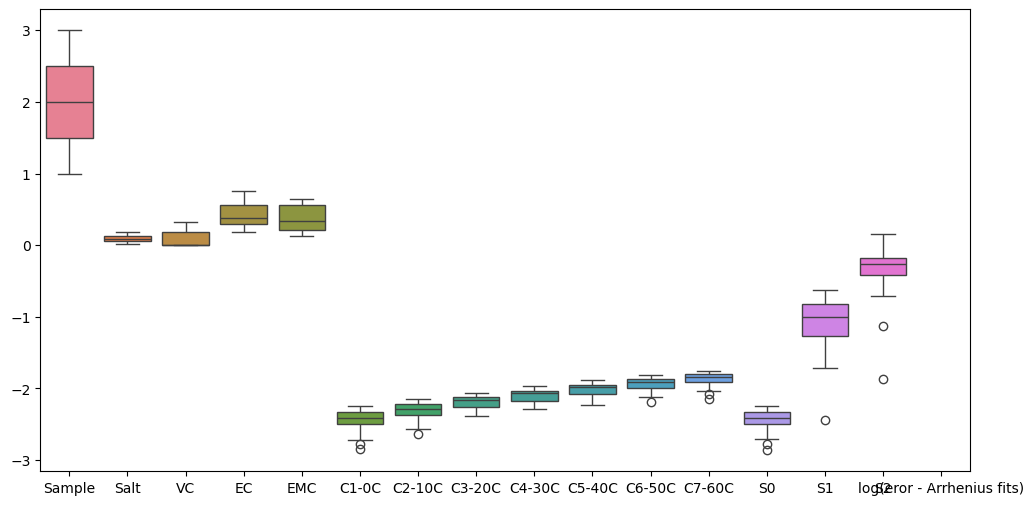

In [82]:
dataSet[(dataSet >= -3) & (dataSet <= 3)]
plt.figure(figsize=(12,6))
sns.boxplot(dataSet[(dataSet >= -3) & (dataSet <= 3)])


### 2nd way: use low and high fences of the boxplot and remove outer elements:

In [85]:
q1 = pd.DataFrame(data=dataSet).quantile(0.25)[0]
q3 = pd.DataFrame(data=dataSet).quantile(0.75)[0]
iqr = q3 - q1 # Interquartile Range

fenceLow = q1 - (1.5*iqr)
fenceHigh = q3 + (1.5*iqr)


print (f'IQR: {iqr}, Fence Low: {fenceLow}, Fence High: {fenceHigh}')

IQR: 29.5, Fence Low: -30.75, Fence High: 87.25


#### "Outside" boxplot reviews

In [86]:
dataSet[(dataSet < fenceLow) | (dataSet > fenceHigh)].shape[0]

51

#### Keep just the "inside" boxplot points

<Axes: >

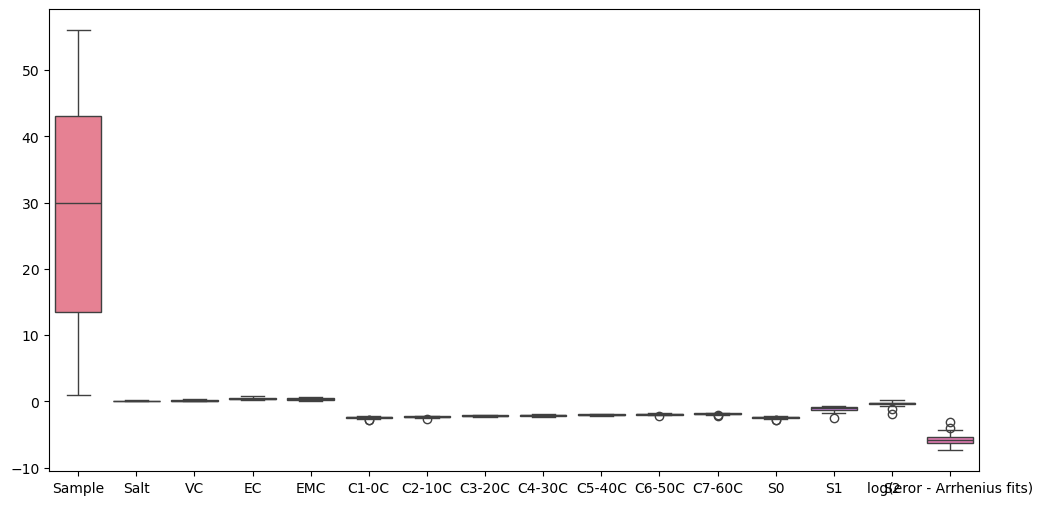

In [88]:
plt.figure(figsize=(12,6))
sns.boxplot(dataSet[(dataSet >= fenceLow) & (dataSet <= fenceHigh)])

## Check if there is any missing values on data

In [89]:
df = pd.DataFrame(data=dataSet)

df.isnull() # True if NaN

,Sample,Salt,VC,EC,EMC,C1-0C,C2-10C,C3-20C,C4-30C,C5-40C,C6-50C,C7-60C,S0,S1,S2,log(eror - Arrhenius fits)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [90]:
df.isnull().sum() # Count of NaN

Sample                        0
Salt                          0
VC                            0
EC                            0
EMC                           0
C1-0C                         0
C2-10C                        0
C3-20C                        0
C4-30C                        0
C5-40C                        0
C6-50C                        0
C7-60C                        0
S0                            0
S1                            0
S2                            0
log(eror - Arrhenius fits)    0
dtype: int64

# Studio Activity 3

### Identify target variable and Predicators

### Conduct and univariate analysis for Predicators

### View a summary statistic of all the variables

### Conduct a Multivariate analysis

### Identify pairwise correlations among the variables and plot them in a heatmap